1/32


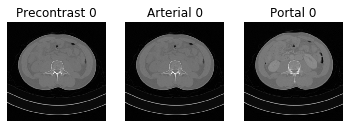

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2/32


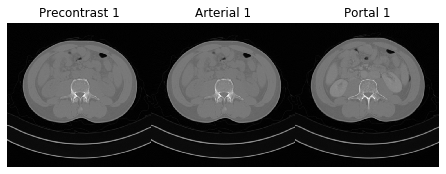

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3/32


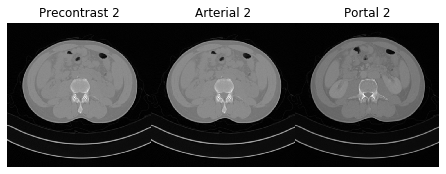

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4/32


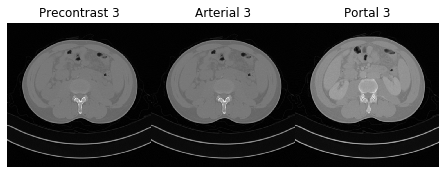

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5/32


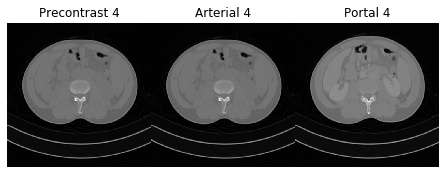

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6/32


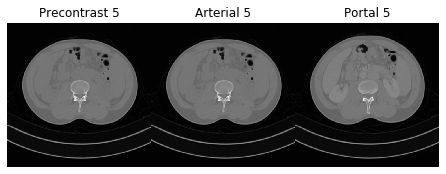

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7/32


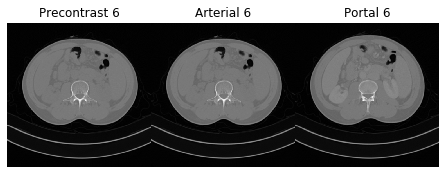

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8/32


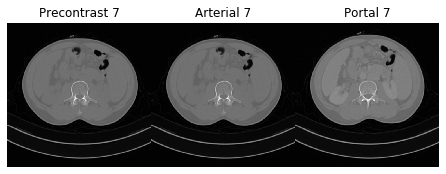

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9/32


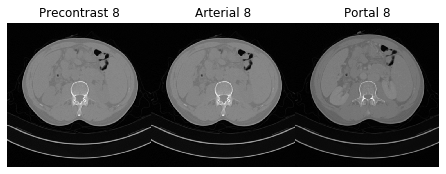

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10/32


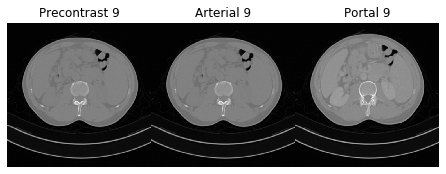

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11/32


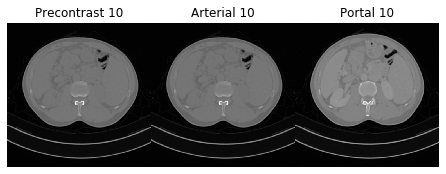

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12/32


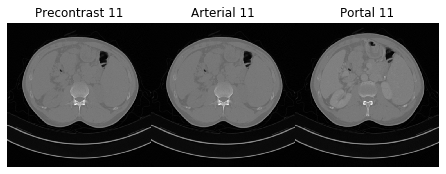

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13/32


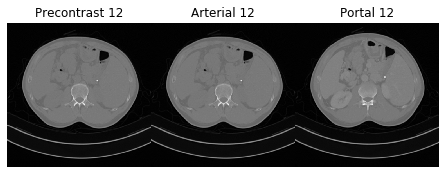

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14/32


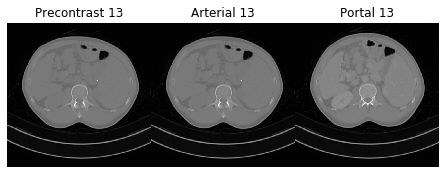

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15/32


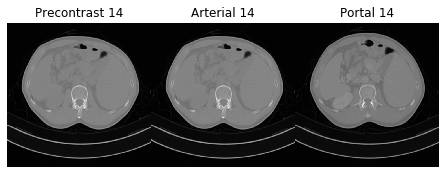

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16/32


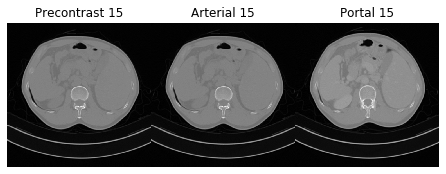

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17/32


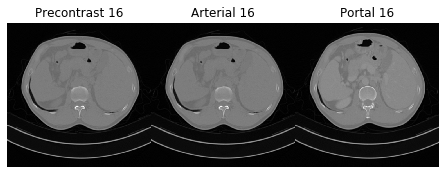

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18/32


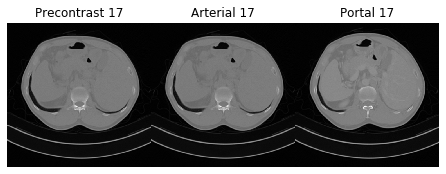

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19/32


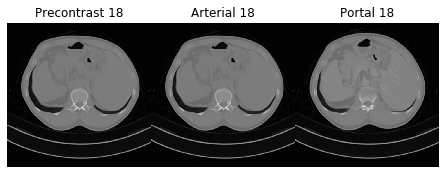

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20/32


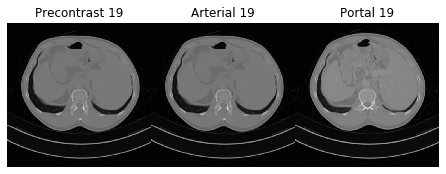

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


21/32


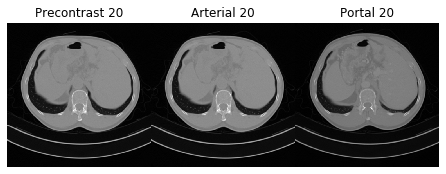

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


22/32


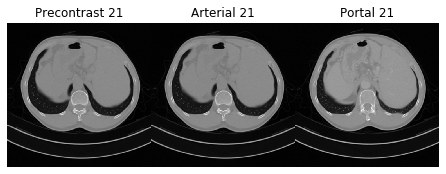

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23/32


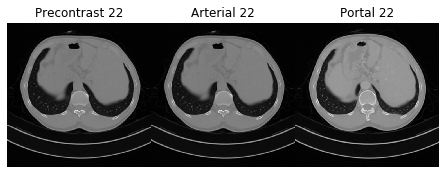

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


24/32


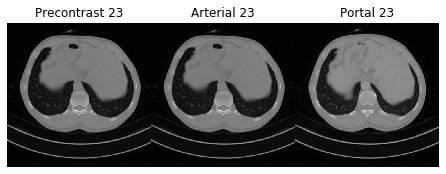

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


25/32


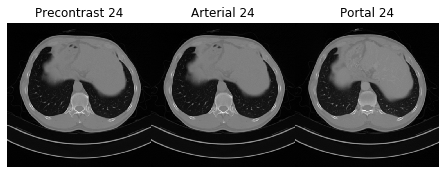

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


26/32


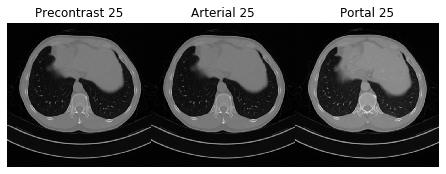

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


27/32


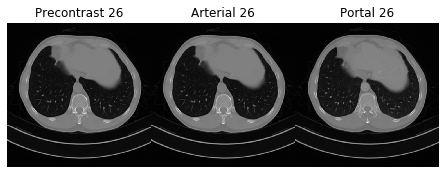

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28/32


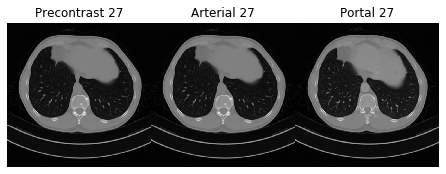

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


29/32


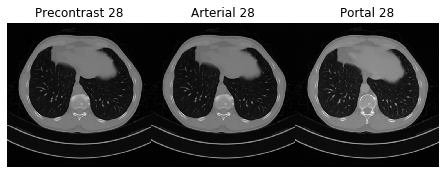

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


30/32


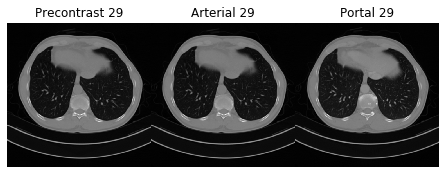

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


31/32


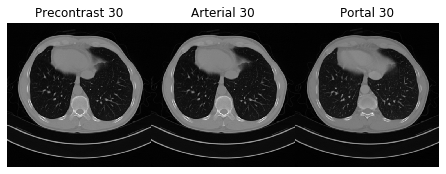

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32/32


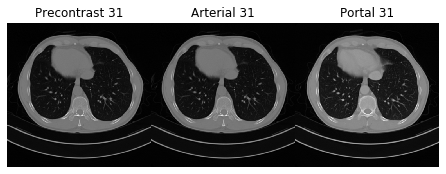

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


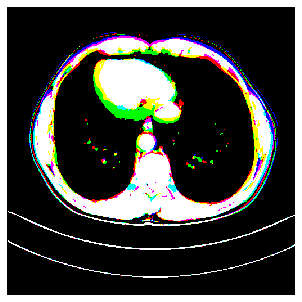

In [12]:
#real_generator
import numpy as np
import random
import numpy
import os
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

root = "C:/Users/user/Desktop/"
file_nums = list(range(1349,1350))

for file_num in file_nums:
        file = "Anonymize_" + str(file_num).zfill(4)+"/"
        path_data = root+file
        
        Precontrast = os.path.join(root, 'R_Anonymize_'+str(file_num).zfill(4)+'.nii')
        Arterial = os.path.join(root, 'A_Anonymize_'+str(file_num).zfill(4)+'.nii')
        Portal = os.path.join(root, 'P_Anonymize_'+str(file_num).zfill(4)+'.nii')
        
        r = nib.load(Precontrast).get_fdata()
        a = nib.load(Arterial).get_fdata()
        p = nib.load(Portal).get_fdata()

        height, width, channel  = p.shape
        

        matrix = cv2.getRotationMatrix2D((width/2, height/2), 270, 1)
        pre_img = cv2.warpAffine(r, matrix, (width, height))
        art_img = cv2.warpAffine(a, matrix, (width, height))
        por_img = cv2.warpAffine(p, matrix, (width, height))
                
        
        
        #make directory
        folder_root = "C:/Users/user/Desktop/hcc_bounded_image/"
        def createFolder(folder_root):
            try:
                if not os.path.exists(folder_root):
                    os.makedirs(folder_root)
            except OSError:
                    print('Error: Creating directory. ' + folder_root)
        createFolder(folder_root+file)
        length = por_img.shape[-1]
        #print & save image
        for i in range(0,length):
            print(str(i+1)+"/"+str(length))
            plt.subplot(131)
            fig = plt.figure(1)
            plt.axis("off") # delete axis
            plt.title('Precontrast '+str(i)) # PreContrast
            plt.imshow(pre_img[::,::,i],cmap = "gray")

            plt.subplot(132)
            plt.axis("off") # delete axis
            plt.title('Arterial '+str(i)) # Arterial
            plt.imshow(pre_img[::,::,i],cmap = "gray")

            plt.subplot(133)
            plt.axis("off") # delete axis
            plt.title('Portal '+str(i)) # Portal
            plt.imshow(por_img[::,::,i],cmap = "gray")
            plt.show()

            a = np.expand_dims(pre_img[::,::,i],-1)
            b = np.expand_dims(art_img[::,::,i],-1)
            c = np.expand_dims(por_img[::,::,i],-1)

            arr = np.concatenate((c,b,a), axis=-1)
            # minimum = np.min(arr)
            # maximum = np.max(arr)
            #arr = 255*((arr-minimum) / (maximum-arr)).astype(np.uint8)
            # print(i,"/",length)
            plt.imshow(arr, cmap ="gray")

            plt.axis('off')
            plt.xticks([]), plt.yticks([])
            plt.tight_layout()
            plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
        #     plt.savefig(folder_root+file+'/'+str(i).zfill(4) + '.png',dpi = 100)
            cv2.imwrite(folder_root+file+'/'+str(file_num)+"_"+str(i).zfill(4)+'.png',arr)   

In [9]:
 plt.imshow(pre_img[::,::,0],-200, 200),cmap = "gray")

SyntaxError: invalid syntax (<ipython-input-9-d7ee10775b59>, line 1)

In [17]:
#parsing liver range
import numpy as np
import random
import numpy
import os
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

root = "C:/Users/user/Desktop/hcc/"
file_nums = list(range(0,1421))
for file_num in file_nums:
    file = "Anonymize_" + str(file_num).zfill(4)+"/"
    path_data = root+file
#     print(path_data)
    liver_range = "liverrange_"+str(file_num).zfill(4)+".txt"
    
    try:
        f = open(os.path.join(path_data, liver_range), 'r')
        a = np.zeros(8)
        
        # print(a)
        i=0
        while True:
            line = f.readline()
            if not line: break
            a[i] = line
            i = i + 1
        f.close()
        pre_start = int(a[0])
        pre_end = int(a[1])
        art_start = int(a[2])
        art_end = int(a[3])
        por_start = int(a[4])
        por_end = int(a[5])
        del_start = int(a[6])
        del_end = int(a[7])

        print(file_num,"=>" ,pre_start,pre_end,art_start,art_end,por_start,por_end,del_start,del_end)
        pre_length = pre_end - pre_start
        art_length = art_end - art_start
        por_length = por_end - por_start
        length = por_length
    
        #load CT data
        Precontrast = os.path.join(path_data, 'R_Anonymize_'+str(file_num).zfill(4)+'.nii')
        Arterial = os.path.join(path_data, 'A_Anonymize_'+str(file_num).zfill(4)+'.nii')
        Portal = os.path.join(path_data, 'P_Anonymize_'+str(file_num).zfill(4)+'.nii')
 
        pre_img = nib.load(Precontrast).get_fdata()
        art_img = nib.load(Arterial).get_fdata()
        por_img = nib.load(Portal).get_fdata()
        
        #make directory
        folder_root = "C:/Users/user/Desktop/hcc_bounded/"
        def createFolder(folder_root):
            try:
                if not os.path.exists(folder_root):
                    os.makedirs(folder_root)
            except OSError:
                    print('Error: Creating directory. ' + folder_root)
        createFolder(folder_root+file)

        #print & save image
        for i in range(0,length):
            print(str(i+1)+"/"+str(length))
            plt.subplot(131)
            fig = plt.figure(1)
            plt.axis("off") # 축 제거
            plt.title('Precontrast '+str(i+pre_start)) # 제목 추가
            plt.imshow(pre_img[::,::,i+pre_start],cmap = "gray")

            plt.subplot(132)
            plt.axis("off") # 축 제거
            plt.title('Arterial '+str(i+art_start)) # 제목 추가
            plt.imshow(pre_img[::,::,i+art_start],cmap = "gray")

            plt.subplot(133)
            plt.axis("off") # 축 제거
            plt.title('Portal '+str(i+por_start)) # 제목 추가
            plt.imshow(por_img[::,::,i+por_start],cmap = "gray")
            plt.show()

            a = np.expand_dims(pre_img[::,::,pre_start+i],-1)
            b = np.expand_dims(art_img[::,::,art_start+i],-1)
            c = np.expand_dims(por_img[::,::,por_start+i],-1)

            arr = np.concatenate((c,b,a), axis=-1)
            # minimum = np.min(arr)
            # maximum = np.max(arr)
            #arr = 255*((arr-minimum) / (maximum-arr)).astype(np.uint8)
            # print(i,"/",length)
            plt.imshow(arr, cmap ="gray")

            plt.axis('off')
            plt.xticks([]), plt.yticks([])
            plt.tight_layout()
            plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
        #     plt.savefig(folder_root+file+'/'+str(i).zfill(4) + '.png',dpi = 100)
            cv2.imwrite(folder_root+file+'/'+str(i).zfill(4)+'.png',arr)   
    except:
#          print("")
            print("No liverange : {}".format(file_num))


0
No liverange : 0
1
No liverange : 1
2
No liverange : 2
3
3 => 6 31 2 27 13 38 1 26
No liverange : 3
4
No liverange : 4
5
5 => 2 44 2 44 1 43 57 99
No liverange : 5
6
No liverange : 6
7
7 => 7 42 8 43 56 91 7 42
No liverange : 7
8
8 => 46 74 11 39 47 75 12 40
No liverange : 8
9
No liverange : 9


In [1]:
#parsing liver range
import numpy as np
import random
import os
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

root = "C:/Users/user/Desktop/hcc/"
file_num = "0015"
file = "Anonymize_"+file_num+"/"
path_data = root+file
liver_range = "liverrange_"+file_num+".txt"
f = open(root+file+liver_range, 'r')
a = np.zeros(8)
# print(a)
i=0
while True:
    line = f.readline()
    if not line: break
    a[i] = line
    i = i + 1
f.close()
pre_start = int(a[0])
pre_end = int(a[1])
art_start = int(a[2])
art_end = int(a[3])
por_start = int(a[4])
por_end = int(a[5])
del_start = int(a[6])
del_end = int(a[7])


print(pre_start,pre_end,art_start,art_end,por_start,por_end,del_start,del_end)
pre_length = pre_end - pre_start
art_length = art_end - art_start
por_length = por_end - por_start
length = por_length

Precontrast = os.path.join(path_data, 'R_Anonymize_'+file_num+'.nii')
Arterial = os.path.join(path_data, 'A_Anonymize_'+file_num+'.nii')
Portal = os.path.join(path_data, 'P_Anonymize_'+file_num+'.nii')

pre_img = nib.load(Precontrast).get_fdata()
art_img = nib.load(Arterial).get_fdata()
por_img = nib.load(Portal).get_fdata()

print(pre_length, art_length, por_length)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/Desktop/hcc/Anonymize_0015/liverrange_0015.txt'

1/43


NameError: name 'pre_img' is not defined

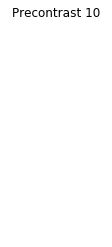

In [7]:
#make directory and Concatenate
folder_root = "C:/Users/user/Desktop/hcc_bounded/"
def createFolder(folder_root):
    try:
        if not os.path.exists(folder_root):
            os.makedirs(folder_root)
    except OSError:
            print('Error: Creating directory. ' + folder_root)
createFolder(folder_root+file)

# print(np.expand_dims(pre_img[::,::,0],-1).shape)
# print(np.expand_dims(art_img[::,::,0],-1).shape)
# print(np.expand_dims(por_img[::,::,0],-1).shape)

for i in range(0,length):
    print(str(i+1)+"/"+str(length))
    plt.subplot(131)
    fig = plt.figure(1)
    plt.axis("off") # 축 제거
    plt.title('Precontrast '+str(i+pre_start)) # 제목 추가
    plt.imshow(pre_img[::,::,i+pre_start],cmap = "gray")

    plt.subplot(132)
    plt.axis("off") # 축 제거
    plt.title('Arterial '+str(i+art_start)) # 제목 추가
    plt.imshow(pre_img[::,::,i+art_start],cmap = "gray")

    plt.subplot(133)
    plt.axis("off") # 축 제거
    plt.title('Portal '+str(i+por_start)) # 제목 추가
    plt.imshow(por_img[::,::,i+por_start],cmap = "gray")
    plt.show()
    
    a = np.expand_dims(pre_img[::,::,pre_start+i],-1)
    b = np.expand_dims(art_img[::,::,art_start+i],-1)
    c = np.expand_dims(por_img[::,::,por_start+i],-1)

    arr = np.concatenate((c,b,a), axis=-1)
# minimum = np.min(arr)
# maximum = np.max(arr)
#arr = 255*((arr-minimum) / (maximum-arr)).astype(np.uint8)
# print(i,"/",length)
    plt.imshow(arr, cmap ="gray")

    plt.axis('off')
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
#     plt.savefig(folder_root+file+'/'+str(i).zfill(4) + '.png',dpi = 100)
    cv2.imwrite(folder_root+file+'/'+str(i).zfill(4)+'.png',arr)

In [ ]:
# #pixel
# import cv2

# #img = cv2.imread("C:\\Users\\user\\Documents\\test\\34.png", cv2.IMREAD_UNCHANGED) #142*88

# img = cv2.imread("C:\\Users\\user\\\\27.png", cv2.IMREAD_GRAYSCALE) #105*86
# #img = cv2.imread("C:\\Users\\user\\Documents\\test\\2.png", cv2.IMREAD_GRAYSCALE)
# #img = cv2.imread("C:\\Users\\user\\Documents\\test\\34.png", cv2.IMREAD_UNCHANGED)
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.imshow(img,cmap = "gray") 
# height, width = img.shape
# x1=width
# y1=height
# x2=0
# y2=0
# for i in range (0,width): 
#     print("(",i,",",end='') 
#     for j in range(0,height):
#         if img[j][i] != 0:
#             print(j,' ',end='')
#     print(")")
    
# for i in range (0,width):    
#     for j in range(0,height):
#         if img[j][i] != 0:
#             x1 = min(x1,i)
#             y1 = min(y1,j)
#             x2 = max(x2,i)
#             y2 = max(y2,j)

# print(x1,y1,x2,y2)
# print(width, height)
# print(img.size)
# # plot(y1,y2,x1,x2)

In [ ]:
# #sample box

# x1 = [97,144,86,85,83,82,82,82,83,86,123,104,130,112,131]
# x2 = [189,218,224,183,181,179,179,179,180,182,188,198,235,238,196]
# y1 = [147,158,92,160,165,164,163,161,159,155,145,119,137,116,135]
# y2 = [241,233,230,249,253,255,255,254,252,249,227,211,246,242,201]
# slice_num = [27,27,27,28,29,30,31,32,33,34,35,35,35,35,36]



# for i in range(img.shape[-1]): 
#     fig = plt.figure(1)
#     plt.xlabel(i)
#     plt.ylabel('Y')
#     plt.imshow(img[:, :, i], cmap="gray")
#     for j in range(0,len(x1)):
#         if i==slice_num[j]:
#             plot(x1[j],y1[j],x2[j],y2[j])
#             plt.axis('off'), plt.xticks([]), plt.yticks([])
#             plt.tight_layout()
#             plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# #             fig = plt.figure(figsize = (7,7))
            
# #                save file
# #             if (slice_num[j%len(x1)] != slice_num[(j+1)%len(x1)]):
# #                 plt.savefig('%d.png'%slice_num[j], dpi=fig.dpi)
# #                 j=j+1
#     plt.show()
#     plt.close(fig)
#     plt.close(1)

In [ ]:
# #plot function
# import matplotlib.pyplot as plt
# import numpy as np

# def plot(y1,y2,x1,x2):
        
#     point1 = [x1,x1]
#     point2 = [y1,y2]
#     point3 = [x1,x2]
#     point4 = [y1,y1]
#     point5 = [x2,x1]
#     point6 = [y2,y2]
#     point7 = [x2,x2]
#     point8 = [y2,y1]
    
#     plt.plot(point1, point2,label='parametric curve',color='red')
#     plt.plot(point7, point2,label='parametric curve',color='red')
#     plt.plot(point3, point4,label='parametric curve',color='red')
#     plt.plot(point3, point6,label='parametric curve',color='red')
    
#     print(x1,x2,y1,y2)

In [ ]:
# #print CT image
# for i in range(0,length):
#     plt.subplot(131)
#     fig = plt.figure(1)
# #     plt.axis("off") # 축 제거
#     plt.title('Precontrast '+str(i+pre_start)) # 제목 추가
#     plt.imshow(pre_img[::,::,i+pre_start],cmap = "gray")

#     plt.subplot(132)
# #     plt.axis("off") # 축 제거
#     plt.title('Arterial '+str(i+art_start)) # 제목 추가
#     plt.imshow(pre_img[::,::,i+art_start],cmap = "gray")

#     plt.subplot(133)
# #     plt.axis("off") # 축 제거
#     plt.title('Portal '+str(i+por_start)) # 제목 추가
#     plt.imshow(por_img[::,::,i+por_start],cmap = "gray")
#     plt.show()

In [ ]:
#load CT dataset Pre, Art, Portal 
# import os
# import nibabel as nib
# import matplotlib.pyplot as plt

# path_data = root+file

# Precontrast = os.path.join(path_data, 'R_Anonymize_'+file_num+'.nii')
# Arterial = os.path.join(path_data, 'A_Anonymize_'+file_num+'.nii')
# Portal = os.path.join(path_data, 'P_Anonymize_'+file_num+'.nii')

# pre_img = nib.load(Precontrast).get_fdata()
# art_img = nib.load(Arterial).get_fdata()
# por_img = nib.load(Portal).get_fdata()